In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_pickle("LSWMD.pkl")

In [3]:
df=dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


Showing some of the data 

In [4]:
df

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]


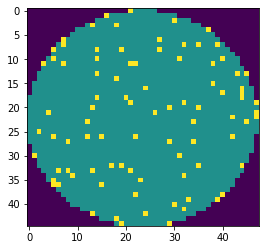

In [5]:
plt.imshow(df['waferMap'][0])

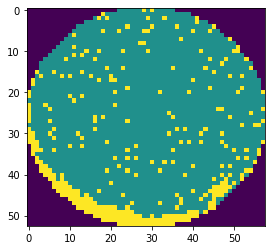

In [6]:
plt.imshow(df['waferMap'][100])

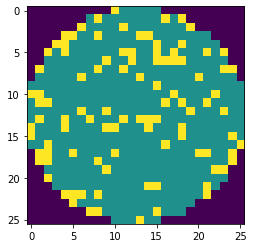

In [7]:
plt.imshow(df['waferMap'][200])

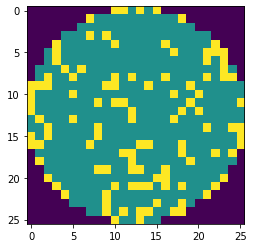

In [8]:
plt.imshow(df['waferMap'][300])

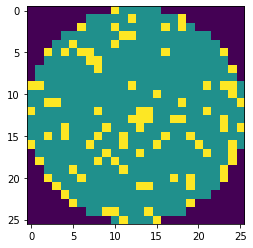

In [9]:
plt.imshow(df['waferMap'][500])

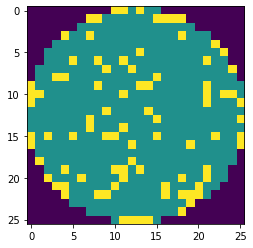

In [10]:
plt.imshow(df['waferMap'][1000])

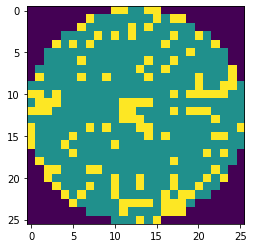

In [11]:
plt.imshow(df['waferMap'][1010])

Aligning with internal name, and resorting the tables arrangement

In [12]:
df=df.rename(columns={'lotName': 'lot_id', 'waferIndex':'wafer_id'})
df['lot_id_wafer_id'] = df['lot_id']+ '_'+(df['wafer_id'].astype(int)).astype(str)
df.drop(['wafer_id', 'lot_id'], axis =1 , inplace = True)
df = df[['lot_id_wafer_id','waferMap','dieSize','failureType']]
df

,lot_id_wafer_id,waferMap,dieSize,failureType
0,lot1_1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[none]]
1,lot1_2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[none]]
2,lot1_3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[none]]
3,lot1_4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[none]]
4,lot1_5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[none]]
...,...,...,...,...
811452,lot47542_23,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,[[Edge-Ring]]
811453,lot47542_24,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,[[Edge-Loc]]
811454,lot47542_25,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,[[Edge-Ring]]
811455,lot47543_1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,[]


Notice that the images are of different shape 

In [13]:
df['shape'] = df['waferMap'].apply(lambda x: x.shape)
df['shape'].value_counts()

(32, 29)    108687
(25, 27)     64083
(49, 39)     39323
(26, 26)     30078
(30, 34)     29513
             ...  
(53, 70)         1
(99, 69)         1
(38, 50)         1
(45, 47)         1
(27, 71)         1
Name: shape, Length: 632, dtype: int64

Do some data processing here: shortlisting only images with size (26,26), dropping unecessary column, and shortlisting only rows with classification information (some data actually is not classified) -> basically just data cleaning

In [14]:
df = df[df['shape']==(26,26)]
df = df.reset_index()
df.drop('index', axis =1, inplace=True)

#just cleaning the table 
df.drop(['dieSize','shape'], axis =1, inplace = True)

#I want only those with classified class
df['classified'] = df['failureType'].apply(lambda x: 1 if len(x)>0 else 0)
df = df[df['classified']==1]
df['Failure_type']=df['failureType'].apply (lambda x: x[0][0])
df.drop(['failureType','classified'], axis =1, inplace = True)
df

,lot_id_wafer_id,waferMap,Failure_type
0,lot7_1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,...",none
1,lot7_2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",none
2,lot7_3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",none
3,lot7_4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...",none
4,lot7_5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",none
...,...,...,...
30049,lot42179_21,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",none
30050,lot42179_22,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,...",none
30051,lot42179_23,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,...",none
30052,lot42179_24,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",none


In [15]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

in kaggle they actually separated to 9 category, however, I will only do 2 category. Either there's pattern detected or no pattern detected. So None -> 0, the rest I will categorize as 1

In [16]:
df['Pattern_detected'] = df['Failure_type'].apply(lambda x: 0 if x =='none' else 1)

The data is not balanced

In [17]:
df['Pattern_detected'].value_counts()

0    13489
1      877
Name: Pattern_detected, dtype: int64

I reduce the size of category 0 to only 1000 data to be used to feed into the model so that it has similar amount of samples for both category 0 and 1

In [18]:
df_with_pattern = df[df['Pattern_detected']==1]

df_without_pattern_1000 = df[df['Pattern_detected']==0][:1000]
df_to_work_on = pd.concat([df_with_pattern,df_without_pattern_1000])

In [19]:
y= df_to_work_on['Pattern_detected']

In [20]:
x= df_to_work_on['waferMap']

In [21]:
x= x.reset_index()

In [22]:
x.drop('index', axis =1 , inplace = True)

In [23]:
x.head(10)

,waferMap
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,..."
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2,..."
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2,..."
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,..."
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,..."
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,..."


So basically for the data they use 2 to label failing dies, 0 for nothing, and 1 for normal dies. I am doing one how encoding on this so we can feed into conv2d with (image_shape, 3)

In [24]:
new_x = np.zeros((len(x), 26, 26, 3))

for w in range(len(x)):
    for i in range(26):
        for j in range(26):
            new_x[w][i][j][int(x['waferMap'][w][i][j])] = 1

In [25]:
X = new_x

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, stratify = y)

First model

In [27]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from sklearn.model_selection import cross_val_score
from keras.layers import Dropout, Dense, MaxPooling2D, Flatten
model = keras.Sequential()
model.add(Conv2D(16, (3, 3), input_shape =(26,26,3),padding="same", activation="relu"))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation ='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=20, verbose=1)


Epoch 1/20
44/44 [==============================] - 2s 30ms/step - loss: 0.5298 - accuracy: 0.7363 - val_loss: 0.3503 - val_accuracy: 0.8383
Epoch 2/20
44/44 [==============================] - 1s 26ms/step - loss: 0.2354 - accuracy: 0.9069 - val_loss: 0.2106 - val_accuracy: 0.9170
Epoch 3/20
44/44 [==============================] - 1s 26ms/step - loss: 0.1361 - accuracy: 0.9552 - val_loss: 0.2203 - val_accuracy: 0.9213
Epoch 4/20
44/44 [==============================] - 1s 26ms/step - loss: 0.0540 - accuracy: 0.9858 - val_loss: 0.2531 - val_accuracy: 0.9106
Epoch 5/20
44/44 [==============================] - 1s 26ms/step - loss: 0.0299 - accuracy: 0.9957 - val_loss: 0.2677 - val_accuracy: 0.9213
Epoch 6/20
44/44 [==============================] - 1s 26ms/step - loss: 0.0184 - accuracy: 0.9986 - val_loss: 0.2765 - val_accuracy: 0.9234
Epoch 7/20
44/44 [==============================] - 1s 26ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.2882 - val_accuracy: 0.9128
Epoch 8/20
44

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


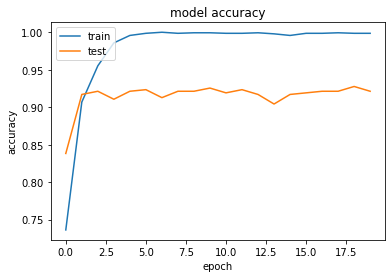

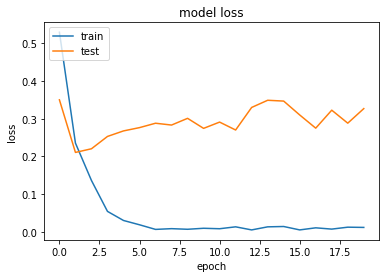

In [28]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
model.evaluate(X_test, y_test)[1]

15/15 [==============================] - 0s 5ms/step - loss: 0.3270 - accuracy: 0.9213


0.9212765693664551

Actually the accuracy is already very good, a bit of overfitting but should be normal. ANW, i just add some dropout layer and add extra layer to try out

In [30]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from sklearn.model_selection import cross_val_score
from keras.layers import Dropout, Dense, MaxPooling2D, Flatten

model1 = keras.Sequential()
model1.add(Conv2D(16, (3, 3), input_shape =(26,26,3),padding="same", activation="relu"))
model1.add(Dropout(0.25))


model1.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation = 'relu'))
model1.add(Dropout(0.5))

model1.add(Dense(256, activation = 'relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1, activation ='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)

model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
#I use test data as validation data for history
history1 = model1.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=20, verbose=1)

Epoch 1/20
44/44 [==============================] - 15s 319ms/step - loss: 0.8135 - accuracy: 0.4876 - val_loss: 0.5904 - val_accuracy: 0.6979
Epoch 2/20
44/44 [==============================] - 14s 322ms/step - loss: 0.4046 - accuracy: 0.8280 - val_loss: 0.2233 - val_accuracy: 0.9085
Epoch 3/20
44/44 [==============================] - 14s 329ms/step - loss: 0.2153 - accuracy: 0.9211 - val_loss: 0.2062 - val_accuracy: 0.9191
Epoch 4/20
44/44 [==============================] - 15s 337ms/step - loss: 0.1865 - accuracy: 0.9360 - val_loss: 0.1695 - val_accuracy: 0.9468
Epoch 5/20
44/44 [==============================] - 15s 329ms/step - loss: 0.1742 - accuracy: 0.9396 - val_loss: 0.1948 - val_accuracy: 0.9383
Epoch 6/20
44/44 [==============================] - 14s 326ms/step - loss: 0.1472 - accuracy: 0.9488 - val_loss: 0.1604 - val_accuracy: 0.9426
Epoch 7/20
44/44 [==============================] - 15s 339ms/step - loss: 0.1319 - accuracy: 0.9524 - val_loss: 0.1970 - val_accuracy: 0.9383

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


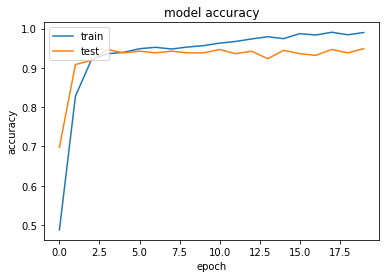

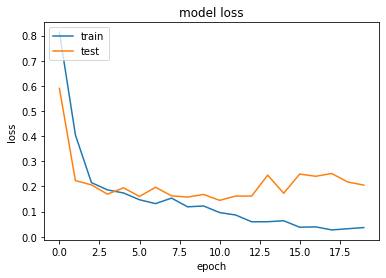

In [31]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
model1.evaluate(X_test,y_test)[1]

15/15 [==============================] - 1s 42ms/step - loss: 0.2055 - accuracy: 0.9489


0.9489361643791199